In [1]:
import pandas as pd

In [2]:
#Original dataset
input_file_path = 'steam_reviews.csv'
# filtered english reviews
output_file_path = 'steam_reviews_filtered.csv'

chunk_size = 500000

#dictionary to count app_id's
app_id_count = {}

#list to keep track of rows to keep
rows_to_keep = []

#maximum number of reviews per app_id
max_reviews_per_app = 10

#total number of filtered reviews to collect
total_filtered_reviews = 20000

#process the file in chunks
for chunk in pd.read_csv(input_file_path, chunksize=chunk_size):
    #filter english language reviews
    chunk_filtered = chunk[chunk['language'] == 'english']
    
    #filter based on app_id count and update counts
    for index, row in chunk_filtered.iterrows():
        app_id = row['app_id']
        
        if app_id in app_id_count and app_id_count[app_id] < max_reviews_per_app:
            app_id_count[app_id] += 1
            rows_to_keep.append(row)
        elif app_id not in app_id_count:
            app_id_count[app_id] = 1
            rows_to_keep.append(row)
        
        #check if the goal is reached
        if len(rows_to_keep) >= total_filtered_reviews:
            break
    
    if len(rows_to_keep) >= total_filtered_reviews:
        break

#create a DataFrame with desired filters
df_to_keep = pd.DataFrame(rows_to_keep).iloc[:total_filtered_reviews]
df_to_keep.to_csv(output_file_path, index=False)

print(f"Collected {min(len(rows_to_keep), total_filtered_reviews)} filtered reviews.")


Collected 3150 filtered reviews.


In [3]:
f_df = pd.read_csv('steam_reviews_filtered.csv')


In [4]:
#count the number of unique app_id's
f_df.app_id.nunique()

315

In [5]:
#analyze the helpful votes distribution among reviews
f_df.votes_helpful.value_counts()

votes_helpful
0     2596
1      355
2       95
3       49
4       22
5       15
10       3
9        2
7        2
13       2
14       2
6        2
11       1
12       1
29       1
8        1
49       1
Name: count, dtype: int64

In [6]:
#count the amount of unique reviews
f_df.review_id.nunique()

3150

In [7]:
#analyze the reviews with 0 helpful votes
f_df[f_df['votes_helpful'] == 0].head(30)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,5,292030,The Witcher 3: Wild Hunt,85184171,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,...,True,False,False,76561198170193529,11,1,823.0,823.0,823.0,1.611379e+09
2,6,292030,The Witcher 3: Wild Hunt,85184064,english,"dis gud,",1611379091,1611379091,True,0,...,True,False,False,76561198119302812,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,18,292030,The Witcher 3: Wild Hunt,85180436,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,...,True,False,False,76561198065591528,33,1,23329.0,177.0,23329.0,1.611219e+09
4,20,292030,The Witcher 3: Wild Hunt,85179753,english,Why wouldn't you get this,1611371978,1611371978,True,0,...,True,False,False,76561198996835044,131,2,8557.0,2004.0,8557.0,1.611371e+09
5,21,292030,The Witcher 3: Wild Hunt,85179400,english,it is ok\n,1611371392,1611371392,True,0,...,True,False,False,76561198284845223,60,9,2518.0,242.0,2518.0,1.611371e+09
6,22,292030,The Witcher 3: Wild Hunt,85179341,english,worth\n,1611371318,1611371318,True,0,...,True,False,False,76561198370568524,59,5,553.0,35.0,517.0,1.611374e+09
7,24,292030,The Witcher 3: Wild Hunt,85178164,english,Isn't Geralt hot enough to get both Yennefer a...,1611369478,1611369478,True,0,...,True,False,False,76561198040150323,51,37,165.0,0.0,165.0,1.437876e+09
8,25,292030,The Witcher 3: Wild Hunt,85177892,english,"Very Fun, Would play again!",1611369121,1611369121,True,0,...,True,False,False,76561198040190687,54,1,20168.0,75.0,20092.0,1.611374e+09
9,39,292030,The Witcher 3: Wild Hunt,85174926,english,The game is enjoyable enough but...\n-Combat h...,1611364401,1611364470,True,0,...,True,False,False,76561198020027165,208,105,497.0,370.0,398.0,1.611370e+09


In [8]:
#check if theres any na's in the data
f_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      3150 non-null   int64  
 1   app_id                          3150 non-null   int64  
 2   app_name                        3150 non-null   object 
 3   review_id                       3150 non-null   int64  
 4   language                        3150 non-null   object 
 5   review                          3136 non-null   object 
 6   timestamp_created               3150 non-null   int64  
 7   timestamp_updated               3150 non-null   int64  
 8   recommended                     3150 non-null   bool   
 9   votes_helpful                   3150 non-null   int64  
 10  votes_funny                     3150 non-null   int64  
 11  weighted_vote_score             3150 non-null   float64
 12  comment_count                   31

In [9]:
#analyze the columns
f_df.columns

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')

In [10]:
#drop irrelevant columns
f_df = f_df.drop(columns = ['timestamp_created','timestamp_updated','votes_funny','author.steamid','author.num_games_owned','author.num_reviews', 'author.playtime_forever','author.playtime_last_two_weeks', 'author.last_played', 'weighted_vote_score', 'received_for_free','steam_purchase', 'language'])

In [11]:
f_df.head(40)

,Unnamed: 0,app_id,app_name,review_id,review,recommended,votes_helpful,comment_count,written_during_early_access,author.playtime_at_review
0,3,292030,The Witcher 3: Wild Hunt,85184605,"One of the best RPG's of all time, worthy of a...",True,0,0,False,5524.0
1,5,292030,The Witcher 3: Wild Hunt,85184171,"good story, good graphics. lots to do.",True,0,0,False,823.0
2,6,292030,The Witcher 3: Wild Hunt,85184064,"dis gud,",True,0,0,False,4192.0
3,18,292030,The Witcher 3: Wild Hunt,85180436,favorite game of all time cant wait for the Ne...,True,0,0,False,23329.0
4,20,292030,The Witcher 3: Wild Hunt,85179753,Why wouldn't you get this,True,0,0,False,8557.0
5,21,292030,The Witcher 3: Wild Hunt,85179400,it is ok\n,True,0,0,False,2518.0
6,22,292030,The Witcher 3: Wild Hunt,85179341,worth\n,True,0,0,False,517.0
7,24,292030,The Witcher 3: Wild Hunt,85178164,Isn't Geralt hot enough to get both Yennefer a...,True,0,0,False,165.0
8,25,292030,The Witcher 3: Wild Hunt,85177892,"Very Fun, Would play again!",True,0,0,False,20092.0
9,39,292030,The Witcher 3: Wild Hunt,85174926,The game is enjoyable enough but...\n-Combat h...,True,0,0,False,398.0


In [12]:
#drop the reviews with no helpful votes
f_df = f_df[f_df['votes_helpful'] != 0]


In [13]:
f_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 554 entries, 19 to 3140
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   554 non-null    int64  
 1   app_id                       554 non-null    int64  
 2   app_name                     554 non-null    object 
 3   review_id                    554 non-null    int64  
 4   review                       554 non-null    object 
 5   recommended                  554 non-null    bool   
 6   votes_helpful                554 non-null    int64  
 7   comment_count                554 non-null    int64  
 8   written_during_early_access  554 non-null    bool   
 9   author.playtime_at_review    554 non-null    float64
dtypes: bool(2), float64(1), int64(5), object(2)
memory usage: 40.0+ KB


In [14]:
#drop all reviews written during early access
f_df = f_df[f_df['written_during_early_access'] == False]


In [15]:
#drop all reviews written with less than 10 hours playtime
f_df = f_df[f_df['author.playtime_at_review'] >= 600]


In [16]:
f_df.shape

(287, 10)

In [17]:
f_df.head(30)

,Unnamed: 0,app_id,app_name,review_id,review,recommended,votes_helpful,comment_count,written_during_early_access,author.playtime_at_review
19,469405,70,Half-Life,84932345,"Classic of the classics, never gets outdated. ...",True,1,0,False,1375.0
30,644797,420,Half-Life 2: Episode Two,84948160,-.-,True,1,0,False,722.0
51,900628,2870,X Rebirth,84172080,"If you sink some time into it you will see, th...",True,1,0,False,6216.0
52,900630,2870,X Rebirth,83329171,"Fun game, the trading part required a bit too ...",True,4,0,False,8730.0
54,900640,2870,X Rebirth,81735874,I loved this jolly romp. Game got a lot of hat...,True,3,0,False,7591.0
57,900650,2870,X Rebirth,79108731,Boring,False,1,0,False,828.0
58,900651,2870,X Rebirth,78404126,pout material for construction on other ship C...,True,3,0,False,46855.0
59,900653,2870,X Rebirth,78182899,"not great, not terrible...",False,3,0,False,12369.0
75,1563157,8930,Sid Meier's Civilization V,85048063,"It's Civ V you know what you're getting into, ...",True,1,0,False,1978.0
85,1734561,381210,Dead by Daylight,84757853,Makes me want to cry and destory everything ar...,True,2,0,False,11634.0


In [20]:
#look for review duplicates
f_df.review.describe()

count     287
unique    286
top        No
freq        2
Name: review, dtype: object

In [21]:
#analyze review duplicate
f_df[f_df.duplicated('review', keep=False)]

,Unnamed: 0,app_id,app_name,review_id,review,recommended,votes_helpful,comment_count,written_during_early_access,author.playtime_at_review
1088,8767799,1118200,People Playground,84865462,No,True,1,0,False,1766.0
2215,20270229,681660,Bless Online,81906292,No,False,4,0,False,13833.0


In [25]:
#analyze review character lengths
f_df['review'].str.len().describe

<bound method NDFrame.describe of 19       80
30        3
51      107
52      253
54      509
       ... 
3117     15
3118     28
3119    158
3122    237
3140    372
Name: review, Length: 287, dtype: int64>

In [29]:
(f_df['review'].str.len() < 15).sum()

29

In [30]:
f_df['review'].str.len().value_counts()

review
15      6
5       5
24      4
35      4
98      3
       ..
2490    1
721     1
19      1
114     1
372     1
Name: count, Length: 216, dtype: int64

In [34]:
f_df['review'].str.len().describe()

count     287.000000
mean      488.864111
std       986.188729
min         1.000000
25%        39.000000
50%       147.000000
75%       470.500000
max      7769.000000
Name: review, dtype: float64

In [37]:
#drop all reviews that are 5 characters and under
f_df = f_df[f_df['review'].str.len() > 5]

In [ ]:
#drop the column 'written during early access' since they are all False
f_df = f_df.drop(columns=['written_during_early_access'])

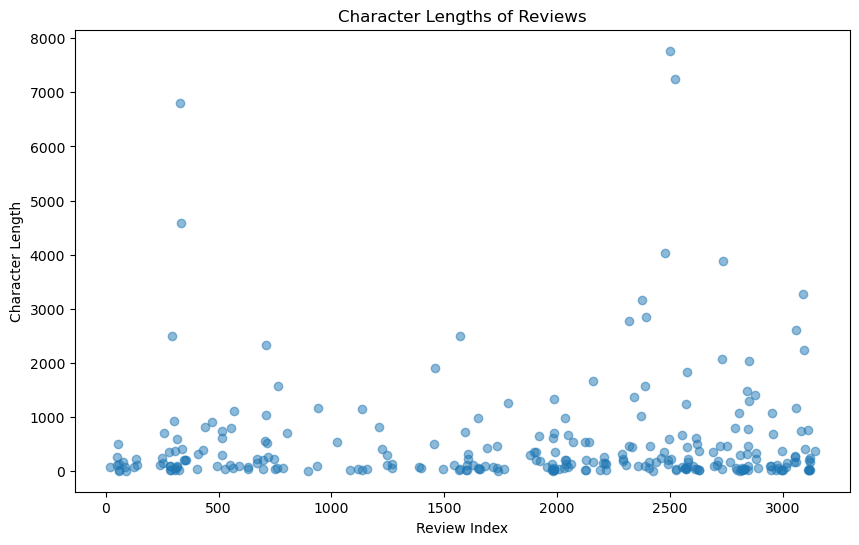

In [42]:
#analyze the review's character length distribution
import matplotlib.pyplot as plt

f_df['review_length'] = f_df['review'].str.len()

#creating the scatter plot
plt.figure(figsize=(10, 6))  
plt.scatter(f_df.index, f_df['review_length'], alpha=0.5) 

plt.title('Character Lengths of Reviews')
plt.xlabel('Review Index')
plt.ylabel('Character Length')

plt.show()


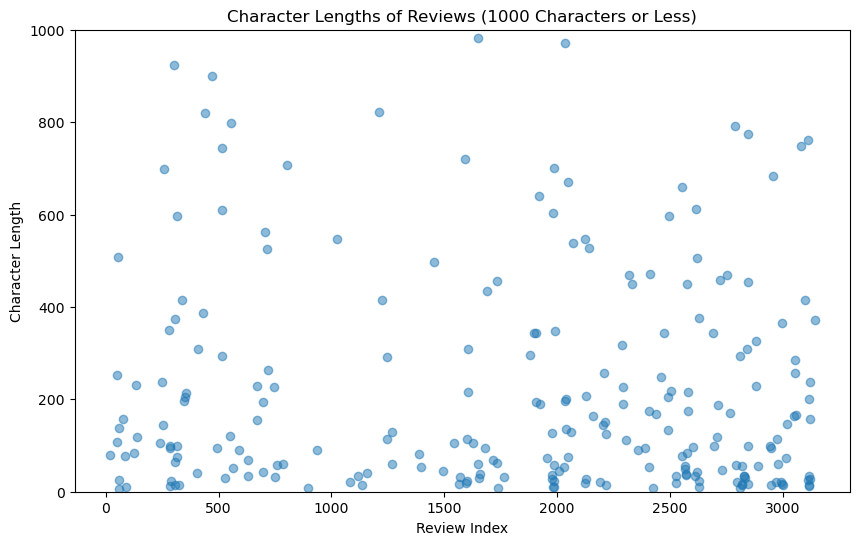

In [43]:
#focus on distributions below 1000 characters
f_df['review_length'] = f_df['review'].str.len()

filtered_df = f_df[f_df['review_length'] <= 1000]

plt.figure(figsize=(10, 6))  
plt.scatter(filtered_df.index, filtered_df['review_length'], alpha=0.5)

plt.title('Character Lengths of Reviews (1000 Characters or Less)')
plt.xlabel('Review Index')
plt.ylabel('Character Length')

plt.ylim(0, 1000)  

plt.show()


In [38]:
f_df.shape

(271, 10)

In [47]:
#analyze dataset
f_df.head(40)

,Unnamed: 0,app_id,app_name,review_id,review,recommended,votes_helpful,comment_count,author.playtime_at_review,review_length
19,469405,70,Half-Life,84932345,"Classic of the classics, never gets outdated. ...",True,1,0,1375.0,80
51,900628,2870,X Rebirth,84172080,"If you sink some time into it you will see, th...",True,1,0,6216.0,107
52,900630,2870,X Rebirth,83329171,"Fun game, the trading part required a bit too ...",True,4,0,8730.0,253
54,900640,2870,X Rebirth,81735874,I loved this jolly romp. Game got a lot of hat...,True,3,0,7591.0,509
57,900650,2870,X Rebirth,79108731,Boring,False,1,0,828.0,6
58,900651,2870,X Rebirth,78404126,pout material for construction on other ship C...,True,3,0,46855.0,138
59,900653,2870,X Rebirth,78182899,"not great, not terrible...",False,3,0,12369.0,26
75,1563157,8930,Sid Meier's Civilization V,85048063,"It's Civ V you know what you're getting into, ...",True,1,0,1978.0,158
85,1734561,381210,Dead by Daylight,84757853,Makes me want to cry and destory everything ar...,True,2,0,11634.0,77
89,1734570,381210,Dead by Daylight,84756064,Great Game,True,1,0,2647.0,10


In [48]:
f_df.reset_index(drop=True, inplace=True)


In [49]:
#reset index
f_df.head()

,Unnamed: 0,app_id,app_name,review_id,review,recommended,votes_helpful,comment_count,author.playtime_at_review,review_length
0,469405,70,Half-Life,84932345,"Classic of the classics, never gets outdated. ...",True,1,0,1375.0,80
1,900628,2870,X Rebirth,84172080,"If you sink some time into it you will see, th...",True,1,0,6216.0,107
2,900630,2870,X Rebirth,83329171,"Fun game, the trading part required a bit too ...",True,4,0,8730.0,253
3,900640,2870,X Rebirth,81735874,I loved this jolly romp. Game got a lot of hat...,True,3,0,7591.0,509
4,900650,2870,X Rebirth,79108731,Boring,False,1,0,828.0,6


In [50]:
f_df.drop(columns=['Unnamed: 0'], inplace=True)


In [51]:
#drop Unnamed column
f_df.head()

,app_id,app_name,review_id,review,recommended,votes_helpful,comment_count,author.playtime_at_review,review_length
0,70,Half-Life,84932345,"Classic of the classics, never gets outdated. ...",True,1,0,1375.0,80
1,2870,X Rebirth,84172080,"If you sink some time into it you will see, th...",True,1,0,6216.0,107
2,2870,X Rebirth,83329171,"Fun game, the trading part required a bit too ...",True,4,0,8730.0,253
3,2870,X Rebirth,81735874,I loved this jolly romp. Game got a lot of hat...,True,3,0,7591.0,509
4,2870,X Rebirth,79108731,Boring,False,1,0,828.0,6
